In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#データをセット。(10,10)と(12,12)の周りにランダムにデータを配置している
def f(x):
    noise_x, noise_y = np.random.random_sample(x.size), np.random.random_sample(x.size)
    for i in range(0, 10):
        if noise_y[i] < 0.5:
            noise_y[i] = (-1) * noise_y[i]
    for j in range(0, 10):
        if noise_x[j] < 0.5:
            noise_x[j] = (-1) * noise_x[j]
    y = x + noise_y
    x = x + noise_x
    return ([x,y])

x = np.array([10, 10, 10, 10, 10, 12, 12, 12, 12, 12])
data = np.array(f(x))
center1 = np.array([10.5, 12])
center2 = np.array([12, 10.5])
#center1 = np.array([1, 2])
#center2 = np.array([1, 1])

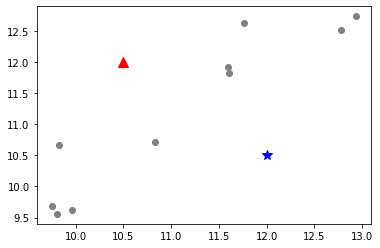

In [3]:
fig, ax = plt.subplots()
ax.scatter(data[0], data[1], c='gray')
ax.plot(center1[0], center1[1], c='r', marker='^', markersize=10)
ax.plot(center2[0], center2[1], c='b', marker='*', markersize=10)

In [4]:
#距離と重心を計算するための関数を定義
def distance(vector1, vector2):
    vector = vector1 - vector2
    return (np.sqrt(np.dot(vector, np.transpose(vector))))

def gravity_point(vector, n):
    return (np.sum(vector, axis=1) / n)

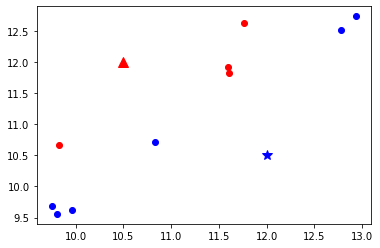

In [5]:
#先の散布図で、青と赤の距離を比較し、青に近いものを青、赤に近いものを赤として描画
data = data.transpose()
fig, ax = plt.subplots()
blue_count = 0
red_count = 0
blue_cluster = np.empty(0)
red_cluster = np.empty(0)
for vector in data:
    if distance(vector, center1) >= distance(vector, center2):
        ax.plot(vector[0], vector[1], c='b', marker='o')
        blue_count += 1
        blue_cluster = np.append(blue_cluster, vector)
    elif distance(vector, center1) < distance(vector, center2):
        ax.plot(vector[0], vector[1], c='r', marker='o')
        red_count += 1
        red_cluster = np.append(red_cluster, vector)
ax.plot(center1[0], center1[1], c='r', marker='^', markersize=10)
ax.plot(center2[0], center2[1], c='b', marker='*', markersize=10)
plt.show()

[ 9.82355238 10.65850992  9.7511019   9.68341448  9.80125241  9.55805385
  9.96294622  9.62871152]


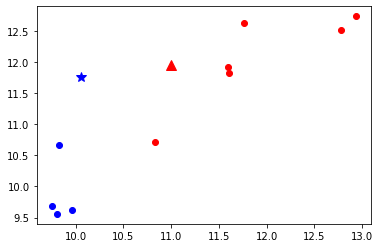

In [6]:
#青、赤で分けられたものからさらに重心(平均)が計算できるので、平均を計算したのち、重心を動かす
#何回かこのセルのコードを実行してみると重心が動いているのがわかるはず
blue_cluster = blue_cluster.reshape(2, int(blue_cluster.size / 2))
red_cluster = red_cluster.reshape(2, int(red_cluster.size / 2))
center1 = gravity_point(red_cluster, red_count)
center2 = gravity_point(blue_cluster, blue_count)
fig, ax = plt.subplots()
blue_count = 0
red_count = 0
blue_cluster = np.empty(0)
red_cluster = np.empty(0)
for vector in data:
    if distance(vector, center1) >= distance(vector, center2):
        ax.plot(vector[0], vector[1], c='b', marker='o')
        blue_count += 1
        blue_cluster = np.append(blue_cluster, vector)
    elif distance(vector, center1) < distance(vector, center2):
        ax.plot(vector[0], vector[1], c='r', marker='o')
        red_count += 1
        red_cluster = np.append(red_cluster, vector)
ax.plot(center1[0], center1[1], c='r', marker='^', markersize=10)
ax.plot(center2[0], center2[1], c='b', marker='*', markersize=10)
plt.show()